In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv") 
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv") 

In [3]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
int_col=train.loc[:, train.dtypes == np.int64].columns.tolist()

In [9]:
train[int_col]=train[int_col].astype(np.int32)

In [10]:
int_col=test.loc[:, test.dtypes == np.int64].columns.tolist()

In [11]:
test[int_col]=test[int_col].astype(np.int32)

downcasting

In [12]:
df=pd.concat([train.iloc[:,:-1],test],axis=0).drop(columns=['Id'],axis=1)

Теперь у нас датасет с трейном и тестом в одном

In [13]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [14]:
df.shape

(2919, 79)

In [15]:
for column in df.columns:    
    if df[column].dtype  == 'object':
        df[column].fillna(value = 'None', inplace=True)
    else:
        df[column].fillna(value = df[column].mean(), inplace=True)

Mean потому что наш metric это rmse 

In [16]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

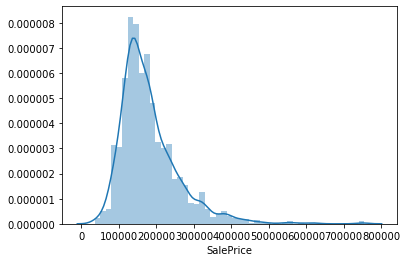

In [17]:
import seaborn as sns
sns.distplot(train.SalePrice)

Немножко сьехал влево 

In [18]:
train["SalePrice"] = np.log1p(train["SalePrice"])

как я узнал с других ноутбуков log(x+1) нормализует 

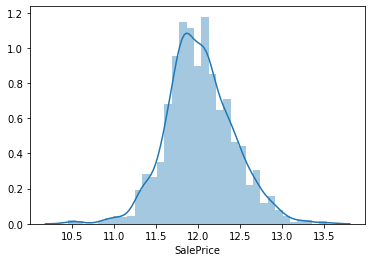

In [19]:
import seaborn as sns
sns.distplot(train.SalePrice)

In [20]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numeric.append(i)

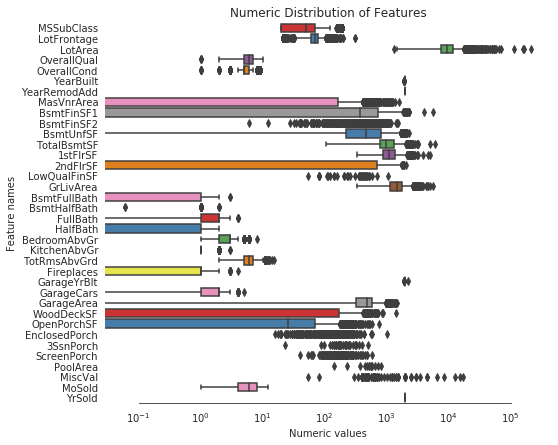

In [21]:
from matplotlib import pyplot as plt
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [22]:
skew_features = df[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

NameError: name 'skew' is not defined

In [23]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

NameError: name 'skew_index' is not defined

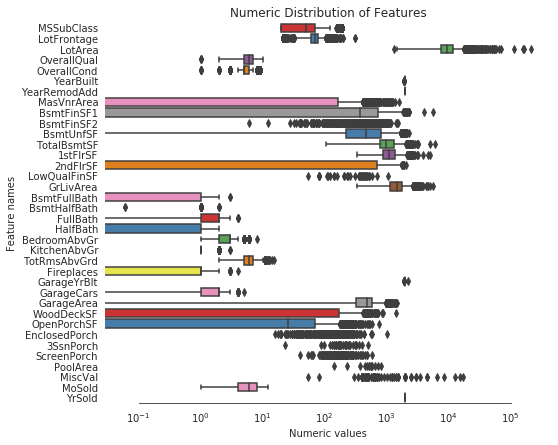

In [24]:
from matplotlib import pyplot as plt
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

Здесь также нужно было нормализовать данные это я подсмотрел с других ноутбуков а также https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0. Этот сайт вышел после того как я хотел узнать что такое skew

In [25]:
df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

создаем новые колонки

In [26]:
X=pd.get_dummies(df.iloc[:1460,:]).values
y=train.SalePrice.values

In [27]:
X.shape, y.shape

((1460, 309), (1460,))

In [28]:
from sklearn.model_selection import train_test_split
X_trains,X_test,y_trains,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       metric= 'rmse',
                       random_state=42)


In [30]:
lightgbm.fit(X_trains,y_trains)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2, feature_fraction_seed=8,
              importance_type='split', learning_rate=0.01, max_bin=200,
              max_depth=-1, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=7000, n_jobs=-1,
              num_leaves=6, objective='regression', random_state=42,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [31]:
y_pred=lightgbm.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred))

mean_squared_error:  0.018464157444222903 
r2_score:  0.9010553580803


In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_trains,y_trains)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = reg.predict(X_test)

In [35]:
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred))

mean_squared_error:  0.0176546625435356 
r2_score:  0.9053932317864944


что то страшное вышло в предыдущих ноутбуках с хужим feature engineering вышло куда лучше

In [36]:
"""from sklearn.model_selection import GridSearchCV
gridsearch_params = [
    (max_depth, min_child_weight,n_estimators)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
    for n_estimators in range(1200,1500,100)
]"""

'from sklearn.model_selection import GridSearchCV\ngridsearch_params = [\n    (max_depth, min_child_weight,n_estimators)\n    for max_depth in range(9,12)\n    for min_child_weight in range(5,8)\n    for n_estimators in range(1200,1500,100)\n]'

In [37]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       eval_metric='rmse',
                       reg_alpha=0.00006,
                       random_state=42)

In [38]:
xgboost.fit(X_trains,y_trains)

[17:34:47] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eval_metric='rmse',
             gamma=0.6, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=0, missing=nan,
             monotone_constraints=None, n_estimators=6000, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, objective='reg:linear',
             random_state=42, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method=None,
             validate_parameters=False, verbosity=None)

In [39]:
y_pred = xgboost.predict(X_test)

In [40]:
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred))

mean_squared_error:  0.024023324154729395 
r2_score:  0.8712652221802684


In [41]:
"""gridsearch_params = [
    (max_depth, min_child_weight,n_estimators,min_samples_split,min_samples_leaf)
    for max_depth in range(10,15)
    for n_estimators in range(800,1500,100)
    for min_samples_split in range(3,7)
    for min_samples_leaf in range(3,7)
                         
]"""

'gridsearch_params = [\n    (max_depth, min_child_weight,n_estimators,min_samples_split,min_samples_leaf)\n    for max_depth in range(10,15)\n    for n_estimators in range(800,1500,100)\n    for min_samples_split in range(3,7)\n    for min_samples_leaf in range(3,7)\n                         \n]'

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [43]:
rf.fit(X_trains,y_trains)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [44]:
y_pred = rf.predict(X_test)

In [45]:
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred))

mean_squared_error:  0.02233942360431168 
r2_score:  0.8802888095003385


Лучше всех справился lightgbm

In [46]:
X_topred=pd.get_dummies(df.iloc[:1459,:]).values

In [47]:
pred=lightgbm.predict(X_topred)

In [48]:
test.Id.shape

(1459,)

In [49]:
pred.shape

(1459,)

In [50]:
pred

array([12.23962107, 12.10961092, 12.27376948, ..., 12.21289683,
       12.45463437, 11.87605988])

In [51]:
pred=np.expm1(pred)

In [52]:
pred

array([206822.50474918, 181607.9297798 , 214007.17093605, ...,
       201368.50527513, 256434.99164652, 143781.91070035])

In [53]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": pred
    })

In [54]:
submission

,Id,SalePrice
0,1461,206822.504749
1,1462,181607.929780
2,1463,214007.170936
3,1464,146750.904500
4,1465,273810.014989
...,...,...
1454,2915,193347.655770
1455,2916,175299.008910
1456,2917,201368.505275
1457,2918,256434.991647


In [55]:
submission.to_csv('predict.csv',index=False)